In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [02:52,  1.47s/it]                                                                                         


Epoch 1 of 100
Generator loss: 1.20491368, Discriminator loss: 1.04086547


118it [02:52,  1.46s/it]                                                                                         


Epoch 2 of 100
Generator loss: 1.05767745, Discriminator loss: 1.02511661


118it [02:51,  1.45s/it]                                                                                         


Epoch 3 of 100
Generator loss: 1.98217279, Discriminator loss: 1.00158179


118it [02:50,  1.45s/it]                                                                                         


Epoch 4 of 100
Generator loss: 5.04015167, Discriminator loss: 0.95858929


118it [02:51,  1.45s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


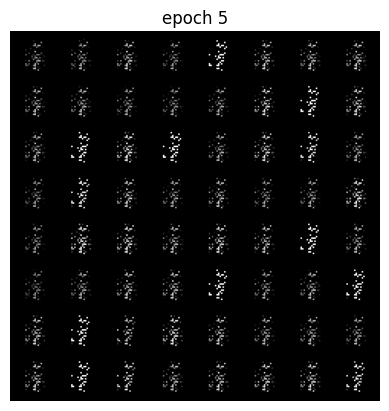

Epoch 5 of 100
Generator loss: 2.70766520, Discriminator loss: 0.91118646


118it [02:49,  1.44s/it]                                                                                         


Epoch 6 of 100
Generator loss: 2.12991144, Discriminator loss: 1.13656007


118it [02:49,  1.44s/it]                                                                                         


Epoch 7 of 100
Generator loss: 2.38165466, Discriminator loss: 1.06966858


118it [02:50,  1.44s/it]                                                                                         


Epoch 8 of 100
Generator loss: 1.16917647, Discriminator loss: 1.25327959


118it [02:52,  1.47s/it]                                                                                         


Epoch 9 of 100
Generator loss: 1.32025822, Discriminator loss: 1.09302855


118it [02:55,  1.49s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


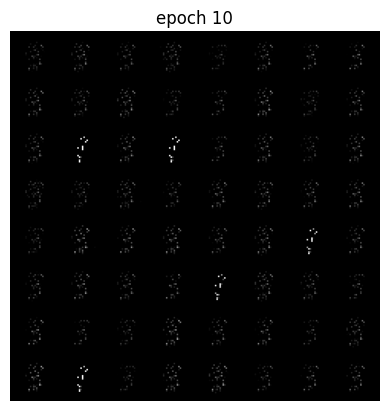

Epoch 10 of 100
Generator loss: 1.16120603, Discriminator loss: 1.26070705


118it [03:00,  1.53s/it]                                                                                         


Epoch 11 of 100
Generator loss: 1.31905216, Discriminator loss: 1.17194902


118it [02:56,  1.49s/it]                                                                                         


Epoch 12 of 100
Generator loss: 1.65001640, Discriminator loss: 1.19448168


118it [02:55,  1.49s/it]                                                                                         


Epoch 13 of 100
Generator loss: 1.54927859, Discriminator loss: 1.26821556


118it [02:55,  1.49s/it]                                                                                         


Epoch 14 of 100
Generator loss: 4.59269225, Discriminator loss: 0.69545244


118it [02:56,  1.49s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


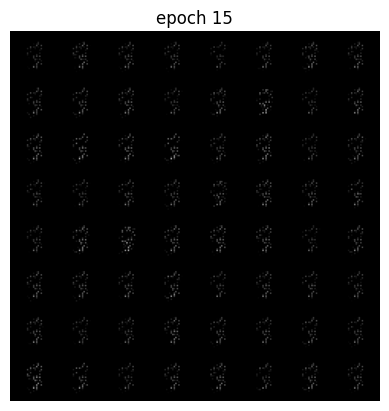

Epoch 15 of 100
Generator loss: 1.68299337, Discriminator loss: 1.09849097


118it [02:56,  1.49s/it]                                                                                         


Epoch 16 of 100
Generator loss: 1.72711026, Discriminator loss: 1.25180655


118it [02:55,  1.48s/it]                                                                                         


Epoch 17 of 100
Generator loss: 2.84210544, Discriminator loss: 1.20518575


118it [02:55,  1.49s/it]                                                                                         


Epoch 18 of 100
Generator loss: 2.08110785, Discriminator loss: 0.91328021


118it [02:55,  1.49s/it]                                                                                         


Epoch 19 of 100
Generator loss: 2.61995695, Discriminator loss: 0.76716935


118it [02:55,  1.49s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


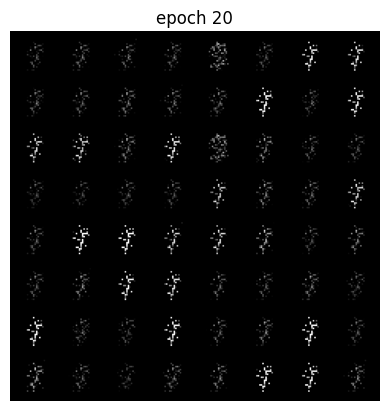

Epoch 20 of 100
Generator loss: 2.30188060, Discriminator loss: 0.83147254


118it [02:55,  1.49s/it]                                                                                         


Epoch 21 of 100
Generator loss: 2.30528296, Discriminator loss: 0.98056632


118it [02:49,  1.43s/it]                                                                                         


Epoch 22 of 100
Generator loss: 2.44104485, Discriminator loss: 1.01855254


118it [02:55,  1.49s/it]                                                                                         


Epoch 23 of 100
Generator loss: 2.01396005, Discriminator loss: 0.92470450


118it [02:54,  1.48s/it]                                                                                         


Epoch 24 of 100
Generator loss: 2.84768225, Discriminator loss: 0.68532954


118it [02:55,  1.49s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


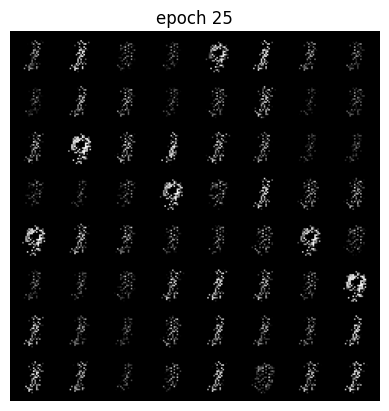

Epoch 25 of 100
Generator loss: 2.29491146, Discriminator loss: 0.76194022


118it [02:55,  1.49s/it]                                                                                         


Epoch 26 of 100
Generator loss: 2.12823966, Discriminator loss: 0.73121993


118it [02:55,  1.49s/it]                                                                                         


Epoch 27 of 100
Generator loss: 2.28025284, Discriminator loss: 0.68361659


118it [02:56,  1.50s/it]                                                                                         


Epoch 28 of 100
Generator loss: 2.56327811, Discriminator loss: 0.58712935


118it [02:57,  1.50s/it]                                                                                         


Epoch 29 of 100
Generator loss: 2.73693430, Discriminator loss: 0.64396572


118it [02:56,  1.50s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


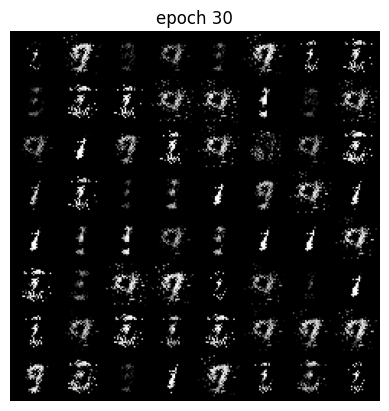

Epoch 30 of 100
Generator loss: 2.38857648, Discriminator loss: 0.72663953


118it [02:58,  1.51s/it]                                                                                         


Epoch 31 of 100
Generator loss: 2.05700139, Discriminator loss: 0.83659686


118it [02:55,  1.49s/it]                                                                                         


Epoch 32 of 100
Generator loss: 2.10043721, Discriminator loss: 0.79168969


118it [02:56,  1.50s/it]                                                                                         


Epoch 33 of 100
Generator loss: 2.04391167, Discriminator loss: 0.76105236


118it [02:55,  1.49s/it]                                                                                         


Epoch 34 of 100
Generator loss: 1.99255503, Discriminator loss: 0.75986613


118it [02:58,  1.52s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


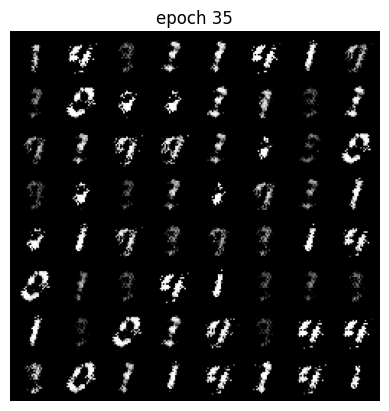

Epoch 35 of 100
Generator loss: 2.29729784, Discriminator loss: 0.74889970


118it [02:56,  1.50s/it]                                                                                         


Epoch 36 of 100
Generator loss: 2.48595702, Discriminator loss: 0.63783682


118it [02:56,  1.50s/it]                                                                                         


Epoch 37 of 100
Generator loss: 2.21575454, Discriminator loss: 0.77725674


118it [02:55,  1.49s/it]                                                                                         


Epoch 38 of 100
Generator loss: 1.73959342, Discriminator loss: 0.84491474


118it [02:57,  1.51s/it]                                                                                         


Epoch 39 of 100
Generator loss: 2.06967421, Discriminator loss: 0.72726713


118it [02:55,  1.49s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


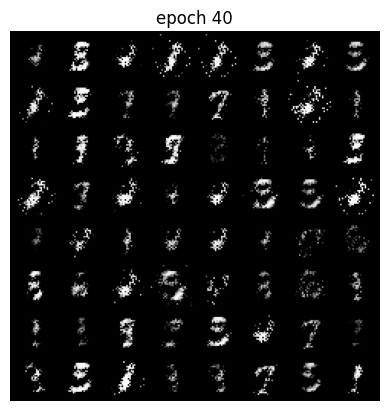

Epoch 40 of 100
Generator loss: 2.13409109, Discriminator loss: 0.74793605


118it [02:55,  1.48s/it]                                                                                         


Epoch 41 of 100
Generator loss: 2.11424723, Discriminator loss: 0.69428604


118it [02:55,  1.49s/it]                                                                                         


Epoch 42 of 100
Generator loss: 2.33530417, Discriminator loss: 0.65002493


118it [02:55,  1.49s/it]                                                                                         


Epoch 43 of 100
Generator loss: 2.21147281, Discriminator loss: 0.72691024


118it [02:55,  1.48s/it]                                                                                         


Epoch 44 of 100
Generator loss: 1.91640095, Discriminator loss: 0.76117437


118it [02:56,  1.50s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


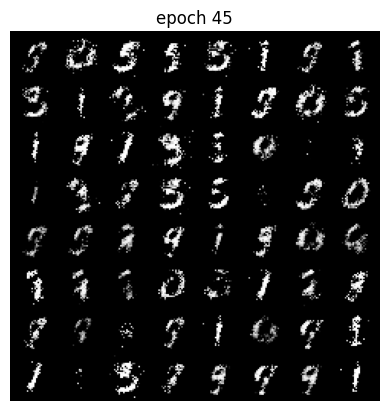

Epoch 45 of 100
Generator loss: 1.86073048, Discriminator loss: 0.81552976


118it [02:56,  1.49s/it]                                                                                         


Epoch 46 of 100
Generator loss: 1.83685721, Discriminator loss: 0.77878810


118it [02:59,  1.52s/it]                                                                                         


Epoch 47 of 100
Generator loss: 1.79392325, Discriminator loss: 0.84049359


118it [02:54,  1.47s/it]                                                                                         


Epoch 48 of 100
Generator loss: 1.90049673, Discriminator loss: 0.78164858


118it [02:50,  1.44s/it]                                                                                         


Epoch 49 of 100
Generator loss: 2.01138779, Discriminator loss: 0.76901449


118it [02:56,  1.50s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


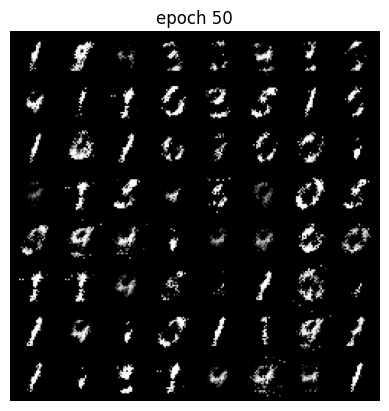

Epoch 50 of 100
Generator loss: 1.95867028, Discriminator loss: 0.78771268


118it [02:58,  1.51s/it]                                                                                         


Epoch 51 of 100
Generator loss: 1.95370360, Discriminator loss: 0.75307955


118it [02:59,  1.52s/it]                                                                                         


Epoch 52 of 100
Generator loss: 2.01104187, Discriminator loss: 0.77309887


118it [02:57,  1.50s/it]                                                                                         


Epoch 53 of 100
Generator loss: 1.97482514, Discriminator loss: 0.84604613


118it [02:56,  1.50s/it]                                                                                         


Epoch 54 of 100
Generator loss: 1.78767282, Discriminator loss: 0.80036047


118it [02:56,  1.49s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


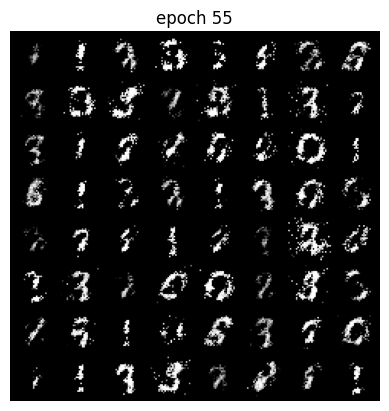

Epoch 55 of 100
Generator loss: 1.81291303, Discriminator loss: 0.89158052


118it [02:56,  1.50s/it]                                                                                         


Epoch 56 of 100
Generator loss: 1.74111665, Discriminator loss: 0.88001406


118it [02:55,  1.49s/it]                                                                                         


Epoch 57 of 100
Generator loss: 1.68374616, Discriminator loss: 0.85148903


118it [02:56,  1.49s/it]                                                                                         


Epoch 58 of 100
Generator loss: 1.75414757, Discriminator loss: 0.85126667


118it [02:56,  1.49s/it]                                                                                         


Epoch 59 of 100
Generator loss: 1.90782050, Discriminator loss: 0.78369270


118it [02:56,  1.50s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


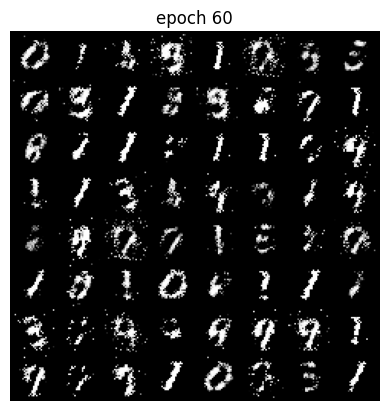

Epoch 60 of 100
Generator loss: 1.87656923, Discriminator loss: 0.81790295


118it [02:56,  1.49s/it]                                                                                         


Epoch 61 of 100
Generator loss: 2.05731926, Discriminator loss: 0.79584041


118it [03:00,  1.53s/it]                                                                                         


Epoch 62 of 100
Generator loss: 1.89596292, Discriminator loss: 0.83419893


118it [02:56,  1.50s/it]                                                                                         


Epoch 63 of 100
Generator loss: 2.05959138, Discriminator loss: 0.80583695


118it [02:52,  1.46s/it]                                                                                         


Epoch 64 of 100
Generator loss: 2.02480459, Discriminator loss: 0.80268258


118it [02:49,  1.44s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


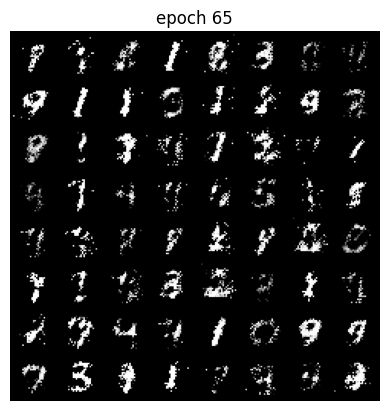

Epoch 65 of 100
Generator loss: 2.03044402, Discriminator loss: 0.79679390


118it [3:11:49, 97.54s/it]                                                                                       


Epoch 66 of 100
Generator loss: 2.06309241, Discriminator loss: 0.79567625


118it [7:50:44, 239.36s/it]                                                                                      


Epoch 67 of 100
Generator loss: 1.85832187, Discriminator loss: 0.85304436


118it [03:26,  1.75s/it]                                                                                         


Epoch 68 of 100
Generator loss: 2.11195259, Discriminator loss: 0.74810150


118it [03:20,  1.70s/it]                                                                                         


Epoch 69 of 100
Generator loss: 2.03467704, Discriminator loss: 0.77440559


118it [02:57,  1.51s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


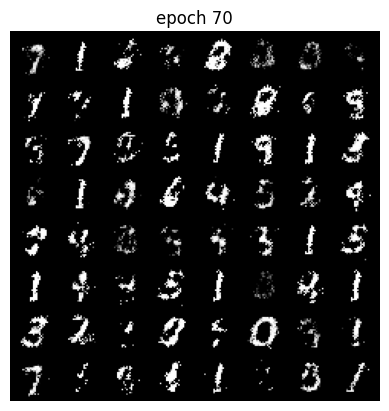

Epoch 70 of 100
Generator loss: 2.03179070, Discriminator loss: 0.77722201


118it [02:57,  1.51s/it]                                                                                         


Epoch 71 of 100
Generator loss: 2.03913437, Discriminator loss: 0.77568280


118it [02:52,  1.46s/it]                                                                                         


Epoch 72 of 100
Generator loss: 2.03280708, Discriminator loss: 0.79177019


118it [03:01,  1.54s/it]                                                                                         


Epoch 73 of 100
Generator loss: 1.91867224, Discriminator loss: 0.83930598


118it [02:51,  1.46s/it]                                                                                         


Epoch 74 of 100
Generator loss: 1.91625280, Discriminator loss: 0.81721501


118it [02:56,  1.49s/it]                                                                                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


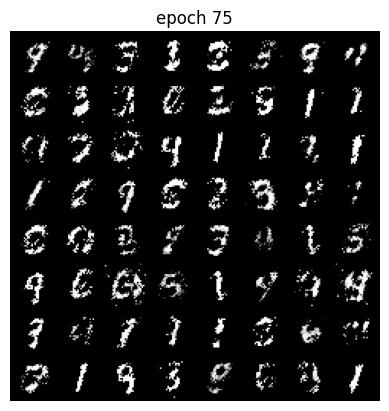

Epoch 75 of 100
Generator loss: 1.83810448, Discriminator loss: 0.82315262


118it [03:05,  1.57s/it]                                                                                         


Epoch 76 of 100
Generator loss: 1.94240756, Discriminator loss: 0.81296813


 74%|███████████████████████████████████████████████████████▏                   | 86/117 [02:16<00:47,  1.54s/it]

In [ ]:
torch.manual_seed(7777)

def generator_loss(data_list, true_labels):
    ############ YOUR CODE HERE ##########
    global noise
    
    loss = 0
    for i, n in enumerate(noise):
        data_point = generator(n)
#         loss += -torch.log(discriminator(data_point)[0][0]) * (1./len(noise))
#         loss += torch.log(1 - discriminator(data_point)[0][0]) * (1./len(noise))
        loss += -torch.log(discriminator(data_point + 0.02 * torch.randn(data_point.shape))[0][0]) * (1./len(noise))
        
    return loss
    
    ######################################
    
def discriminator_loss(data_list, true_labels):
    ############ YOUR CODE HERE ##########
    global noise
    
    loss = 0
    for i, label in enumerate(true_labels):
        data_point = data_list[i][0]
        loss += -torch.log(discriminator(data_point + 0.02 * torch.randn(data_point.shape))[0][0]) * (1./len(true_labels))
    
    for i, n in enumerate(noise):
        data_point = generator(n)
        loss += -torch.log(1-discriminator(data_point + 0.02 * torch.randn(data_point.shape))[0][0]) * (1./len(noise))
        
    return loss
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        data_list, labels = data
        
        optim_d.zero_grad()
        loss_d_curr = discriminator_loss(data_list, labels)
        loss_d_curr.backward()
        optim_d.step()
        
        optim_g.zero_grad()
        loss_g_curr = generator_loss(data_list, labels)
        loss_g_curr.backward()
        optim_g.step()
        
        loss_d += loss_d_curr.detach().numpy()
        loss_g += loss_g_curr.detach().numpy()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [ ]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

In [ ]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

In [ ]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')